## Machine Learning Project

Name | Student Id
---|---
Margaret Naa Dei Neequaye | 22425065
⁠Kelvin Addae Kwarteng | 22427564
⁠Atidzah Godfred Kodzo | 22427528
⁠Eugene Agbovie | 22424943
Adiboye Philip  | 22427838
⁠Erica Karl Bentum | 22425061
⁠Prince Nana Yaw Twieku | 22425155
Jennifer Oppong  | 22425191
⁠Aseye Gbagbo | 22424344
⁠Michael Kusi-Appiah | 22424580
Myrielle Hounsinou | 22424167

Classification of Student performance

In [ ]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#URL to raw_file hosted on github
file_url = r"https://raw.githubusercontent.com/AdiBoye/ml_capstone/refs/heads/main/student-por.csv"
local_file_name = 'students_portuguese_language_scores'

In [ ]:
# Use !wget to download the file directly from GitHub
print(f"Downloading {local_file_name} from GitHub...")
!wget -O $local_file_name $file_url
print("Download complete.")

--2025-12-08 15:13:52--  https://raw.githubusercontent.com/AdiBoye/ml_capstone/refs/heads/main/student-por.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93220 (91K) [text/plain]
Saving to: ‘students_portuguese_language_scores’

students_portuguese 100%[===================>]  91.04K  --.-KB/s    in 0.001s  

2025-12-08 15:13:53 (68.1 MB/s) - ‘students_portuguese_language_scores’ saved [93220/93220]

Download complete.


In [ ]:
type(pd.read_csv(local_file_name, sep=';'))

pandas.core.frame.DataFrame

In [ ]:
#Read Dataset
df = pd.read_csv(local_file_name, sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
#Create copy of data for rollback
data = df.copy()
display(data.head())
print(f"shape of data: {data.shape}")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


shape of data: (649, 33)


### Data Preparation (Preprocessing and Inspection)

In [ ]:
#get column name
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

 No|**data Label** | __description__ | updated_data label |data type
---|-------|-------------|-------------------|----------
1.|school|student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)|school|nominal
2.|sex|student's sex (binary: 'F' - female or 'M' - male)	|sex|nominal
3.|age|student's age (numeric: from 15 to 22)|age|discrete
4.|address|student's home address type (binary: 'U' - urban or 'R' - rural)|locality_type|nominal
5.|famsize|family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)|family_size|ordinal
6.|Pstatus|parent's cohabitation status (binary: 'T' - living together or 'A' - apart)|parents_living_status|nominal
7.|Medu|mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)	|mother_education|ordinal
8.|edu|father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)	|father_education|ordinal
9.|Mjob|mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')|mothers_job|nominal
10.|Fjob|father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')|father_job|nominal
11.|reason|reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')|reason_for_selection|nominal
12.|guardian|student's guardian (nominal: 'mother', 'father' or 'other')|guardian|nominal
13.|traveltime|home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)	|commute_to_school|ordinal
14.|studytime|study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)	|weekly_study_time|ordinal
15.|failures|number of past class failures|failed_past_classes|discrete
16.|schoolsup|extra educational support (binary: yes or no)|extra_education_support|nominal
17.|famsup|family educational support (binary: yes or no)|family_educational_support|nominal
18.|paid|extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)	|extra_paid_class|nominal
19.|activities|extra-curricular activities (binary: yes or no)|extra_curricular_activities|nominal
20.|nursery|attended nursery school (binary: yes or no)	|attended_nursery|nominal
21.|higher|attended nursery school (binary: yes or no)|undertake_higher_education|nominal
22.|internet|Internet access at home (binary: yes or no)|internet|nominal
23.|romantic|with a romantic relationship (binary: yes or no)|romantic_relationship|nominal
24.|famrel|quality of family relationships (numeric: from 1 - very bad to 5 - excellent)|family_relationship|ordinal
25.|freetime|free time after school (numeric: from 1 - very low to 5 - very high)|after_school_time|ordinal
26.|gout|going out with friends (numeric: from 1 - very low to 5 - very high)|go_out_with_friends|ordinal
27.|Dalc|workday alcohol consumption (numeric: from 1 - very low to 5 - very high)|work_day_alcohol_consumption|ordinal
28.|Walc|weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)|weekend+alchohol_consumption|ordinal
29.|health|current health status (numeric: from 1 - very bad to 5 - very good)|health_status|ordinal
30.|abscences|number of school absences (numeric: from 0 to 93)|discrete|
31.|G1|first period grade (numeric: from 0 to 20)|first_peroid_grade|discrete
32.|G2|second period grade (numeric: from 0 to 20)|second_period_grade|discrete
33.|G3|final grade (numeric: from 0 to 20, output target)|final_grade|discrete



In [ ]:
columns_new_name = {
   'address': 'locality_type',
   'famsize': 'family_size',
   'Pstatus': 'parents_living_status',
   'Medu': 'mothers_education',
   'Fedu': 'fathers_education',
   'Mjob': 'mothers_job',
   'Fjob': 'fathers_job',
   'reason': 'reason_for_selection',
   'traveltime': 'commute_to_school',
   'failures': 'failed_passed_courses',
   'schoolsup': 'extra_education_support',
   'famsup': 'extra_family_support',
   'paid': 'extra_paid_class',
   'activities': 'extra_curricular_activities',
   'nursery': 'attended_nursery',
   'higher': 'undertake_higher_education',
   'romantic': 'romantic_relationship',
   'famrel': 'family_relationship',
   'freetime':'after_school_time',
   'goout': 'go_out_with_friends',
   'Dalc': 'workday_alcohol_consumption',
   'Walc': 'weekend_alchohol_consumption',
   'health': 'health_status',
   'G1': 'first_peroid_grade',
   'G2': 'second_peroid_grade',
   'G3': 'final_grade'
}

In [ ]:
#replace column name
data.rename(columns=columns_new_name, inplace=True)
data.head()

,school,sex,age,locality_type,family_size,parents_living_status,mothers_education,fathers_education,mothers_job,fathers_job,...,family_relationship,after_school_time,go_out_with_friends,workday_alcohol_consumption,weekend_alchohol_consumption,health_status,absences,first_peroid_grade,second_peroid_grade,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
#create a copy of data for rollback in case of an error
df = data.copy()

In [ ]:
#Inspect Data for Inconsistencies
data.columns
for i in data.columns:
  print(f"{i}: {data[i].sort_values().unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
age: [15 16 17 18 19 20 21 22]
locality_type: ['R' 'U']
family_size: ['GT3' 'LE3']
parents_living_status: ['A' 'T']
mothers_education: [0 1 2 3 4]
fathers_education: [0 1 2 3 4]
mothers_job: ['at_home' 'health' 'other' 'services' 'teacher']
fathers_job: ['at_home' 'health' 'other' 'services' 'teacher']
reason_for_selection: ['course' 'home' 'other' 'reputation']
guardian: ['father' 'mother' 'other']
commute_to_school: [1 2 3 4]
studytime: [1 2 3 4]
failed_passed_courses: [0 1 2 3]
extra_education_support: ['no' 'yes']
extra_family_support: ['no' 'yes']
extra_paid_class: ['no' 'yes']
extra_curricular_activities: ['no' 'yes']
attended_nursery: ['no' 'yes']
undertake_higher_education: ['no' 'yes']
internet: ['no' 'yes']
romantic_relationship: ['no' 'yes']
family_relationship: [1 2 3 4 5]
after_school_time: [1 2 3 4 5]
go_out_with_friends: [1 2 3 4 5]
workday_alcohol_consumption: [1 2 3 4 5]
weekend_alchohol_consumption: [1 2 3 4 5]
health_status: [1 2 3 

In [ ]:
#Check for missing values
print(f"Duplicated Records: {data.duplicated().sum()}\n\n")


missing_value_count = data.isnull().sum()
missing_value_count.name = 'missing_values'
missing_value_percentage = (missing_value_count*100 / len(data)).round(2)
missing_value_percentage.name = 'percentage'
missing_value_count = pd.concat([missing_value_count,missing_value_percentage], axis=1)
display(missing_value_count)

Duplicated Records: 0




,missing_values,percentage
school,0,0.0
sex,0,0.0
age,0,0.0
locality_type,0,0.0
family_size,0,0.0
parents_living_status,0,0.0
mothers_education,0,0.0
fathers_education,0,0.0
mothers_job,0,0.0
fathers_job,0,0.0


In [ ]:
#Checking Data type of datasets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   school                        649 non-null    object
 1   sex                           649 non-null    object
 2   age                           649 non-null    int64 
 3   locality_type                 649 non-null    object
 4   family_size                   649 non-null    object
 5   parents_living_status         649 non-null    object
 6   mothers_education             649 non-null    int64 
 7   fathers_education             649 non-null    int64 
 8   mothers_job                   649 non-null    object
 9   fathers_job                   649 non-null    object
 10  reason_for_selection          649 non-null    object
 11  guardian                      649 non-null    object
 12  commute_to_school             649 non-null    int64 
 13  studytime           

## EDA

### Plotting Distribution Features

In [ ]:
categorical_features = list(data.select_dtypes(include='object').columns)
numerical_features = list(data.select_dtypes(include='number').columns)

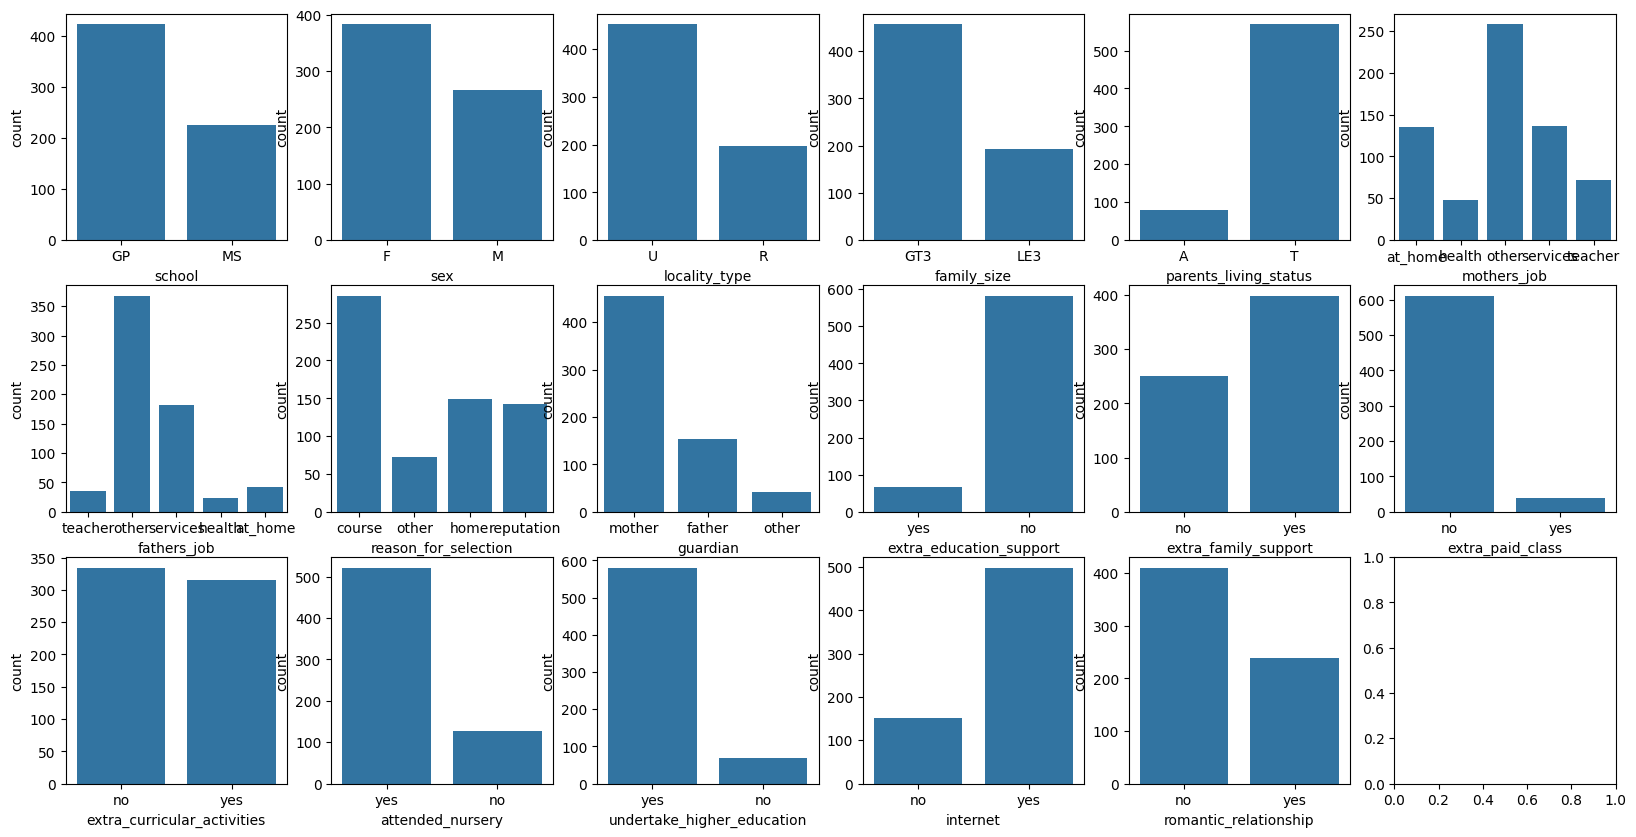

In [ ]:
#Plots Categorical features using Barcharts
fig, ax = plt.subplots((len(categorical_features) // 6) + 1,6, figsize=(20,10))
for i in range(len(categorical_features)):
  c_axes = ax.flat[i]
  sns.countplot(data=data, x=categorical_features[i], ax=c_axes)

plt.show()

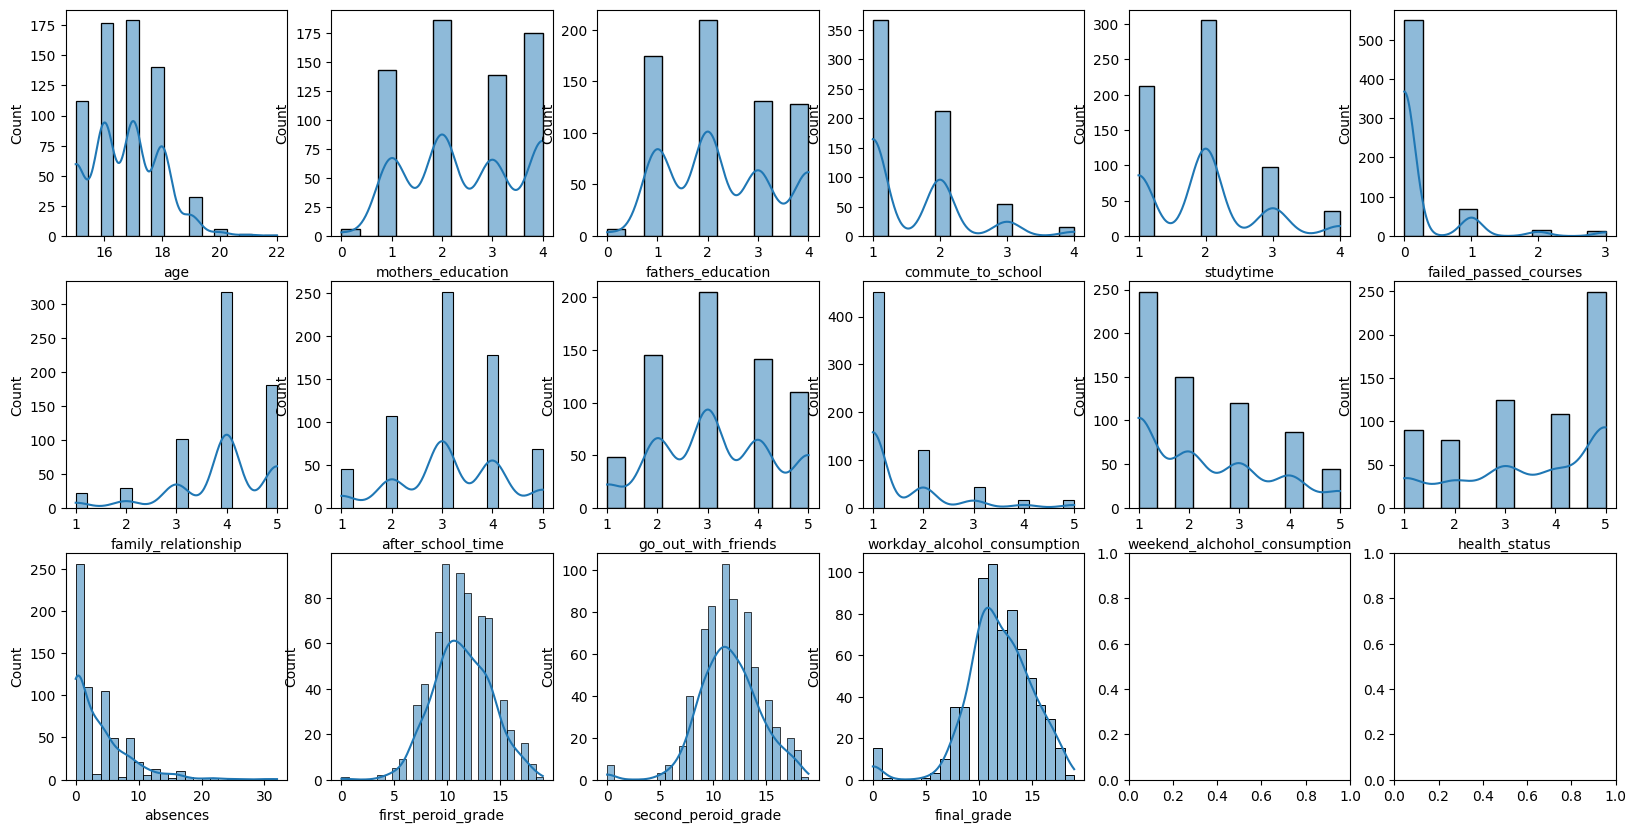

In [ ]:
#Plots Numerical features using histogram
fig, ax = plt.subplots((len(numerical_features) // 6) + 1,6, figsize=(20,10))
for i in range(len(numerical_features)):
  c_axes = ax.flat[i]
  sns.histplot(data=data, x=numerical_features[i], ax=c_axes, kde=True)

plt.show()

In [ ]:
'''Label Encoding of Binary and Ordinal features
   Did not use any encoding methods since we want full control
'''

#Definition of label codes
school = {'GP':0, 'MS':1}
sex = {'F':0, 'M':1}
local = {'U':0, 'R':1}
fam = {'LE3':0, 'GT3':1}
pt_liv = {'A':0, 'T':1}
decision = {'no': 0, 'yes': 1}

#encoding
def encode(feature, code):
  data[feature] = data[feature].map(code)


In [ ]:
encode('school', school)
encode('sex', sex)
encode('locality_type', local)
encode('family_size', fam)
encode('parents_living_status', pt_liv)
encode('extra_education_support', decision)
encode('extra_family_support', decision)
encode('extra_paid_class', decision)
encode('extra_curricular_activities', decision)
encode('attended_nursery', decision)
encode('undertake_higher_education', decision)
encode('internet', decision)
encode('romantic_relationship', decision)
#Preview Data
for i in data.columns:
  print(f"{i}: {data[i].sort_values().unique()}")

school: [0 1]
sex: [0 1]
age: [15 16 17 18 19 20 21 22]
locality_type: [0 1]
family_size: [0 1]
parents_living_status: [0 1]
mothers_education: [0 1 2 3 4]
fathers_education: [0 1 2 3 4]
mothers_job: ['at_home' 'health' 'other' 'services' 'teacher']
fathers_job: ['at_home' 'health' 'other' 'services' 'teacher']
reason_for_selection: ['course' 'home' 'other' 'reputation']
guardian: ['father' 'mother' 'other']
commute_to_school: [1 2 3 4]
studytime: [1 2 3 4]
failed_passed_courses: [0 1 2 3]
extra_education_support: [0 1]
extra_family_support: [0 1]
extra_paid_class: [0 1]
extra_curricular_activities: [0 1]
attended_nursery: [0 1]
undertake_higher_education: [0 1]
internet: [0 1]
romantic_relationship: [0 1]
family_relationship: [1 2 3 4 5]
after_school_time: [1 2 3 4 5]
go_out_with_friends: [1 2 3 4 5]
workday_alcohol_consumption: [1 2 3 4 5]
weekend_alchohol_consumption: [1 2 3 4 5]
health_status: [1 2 3 4 5]
absences: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 21 22 24 26 

### Checking for Outliers and errors in data

In [ ]:
#Update list of categorical and numeric features
categorical_features = list(data.select_dtypes(include='object').columns)
numerical_features = list(data.select_dtypes(include='number').columns)
print(f"Length of categorical data attributes: {len(categorical_features)}")
print(f"Length of numerical data attributes: {len(numerical_features)}")

Length of categorical data attributes: 4
Length of numerical data attributes: 29


### Numerical Data


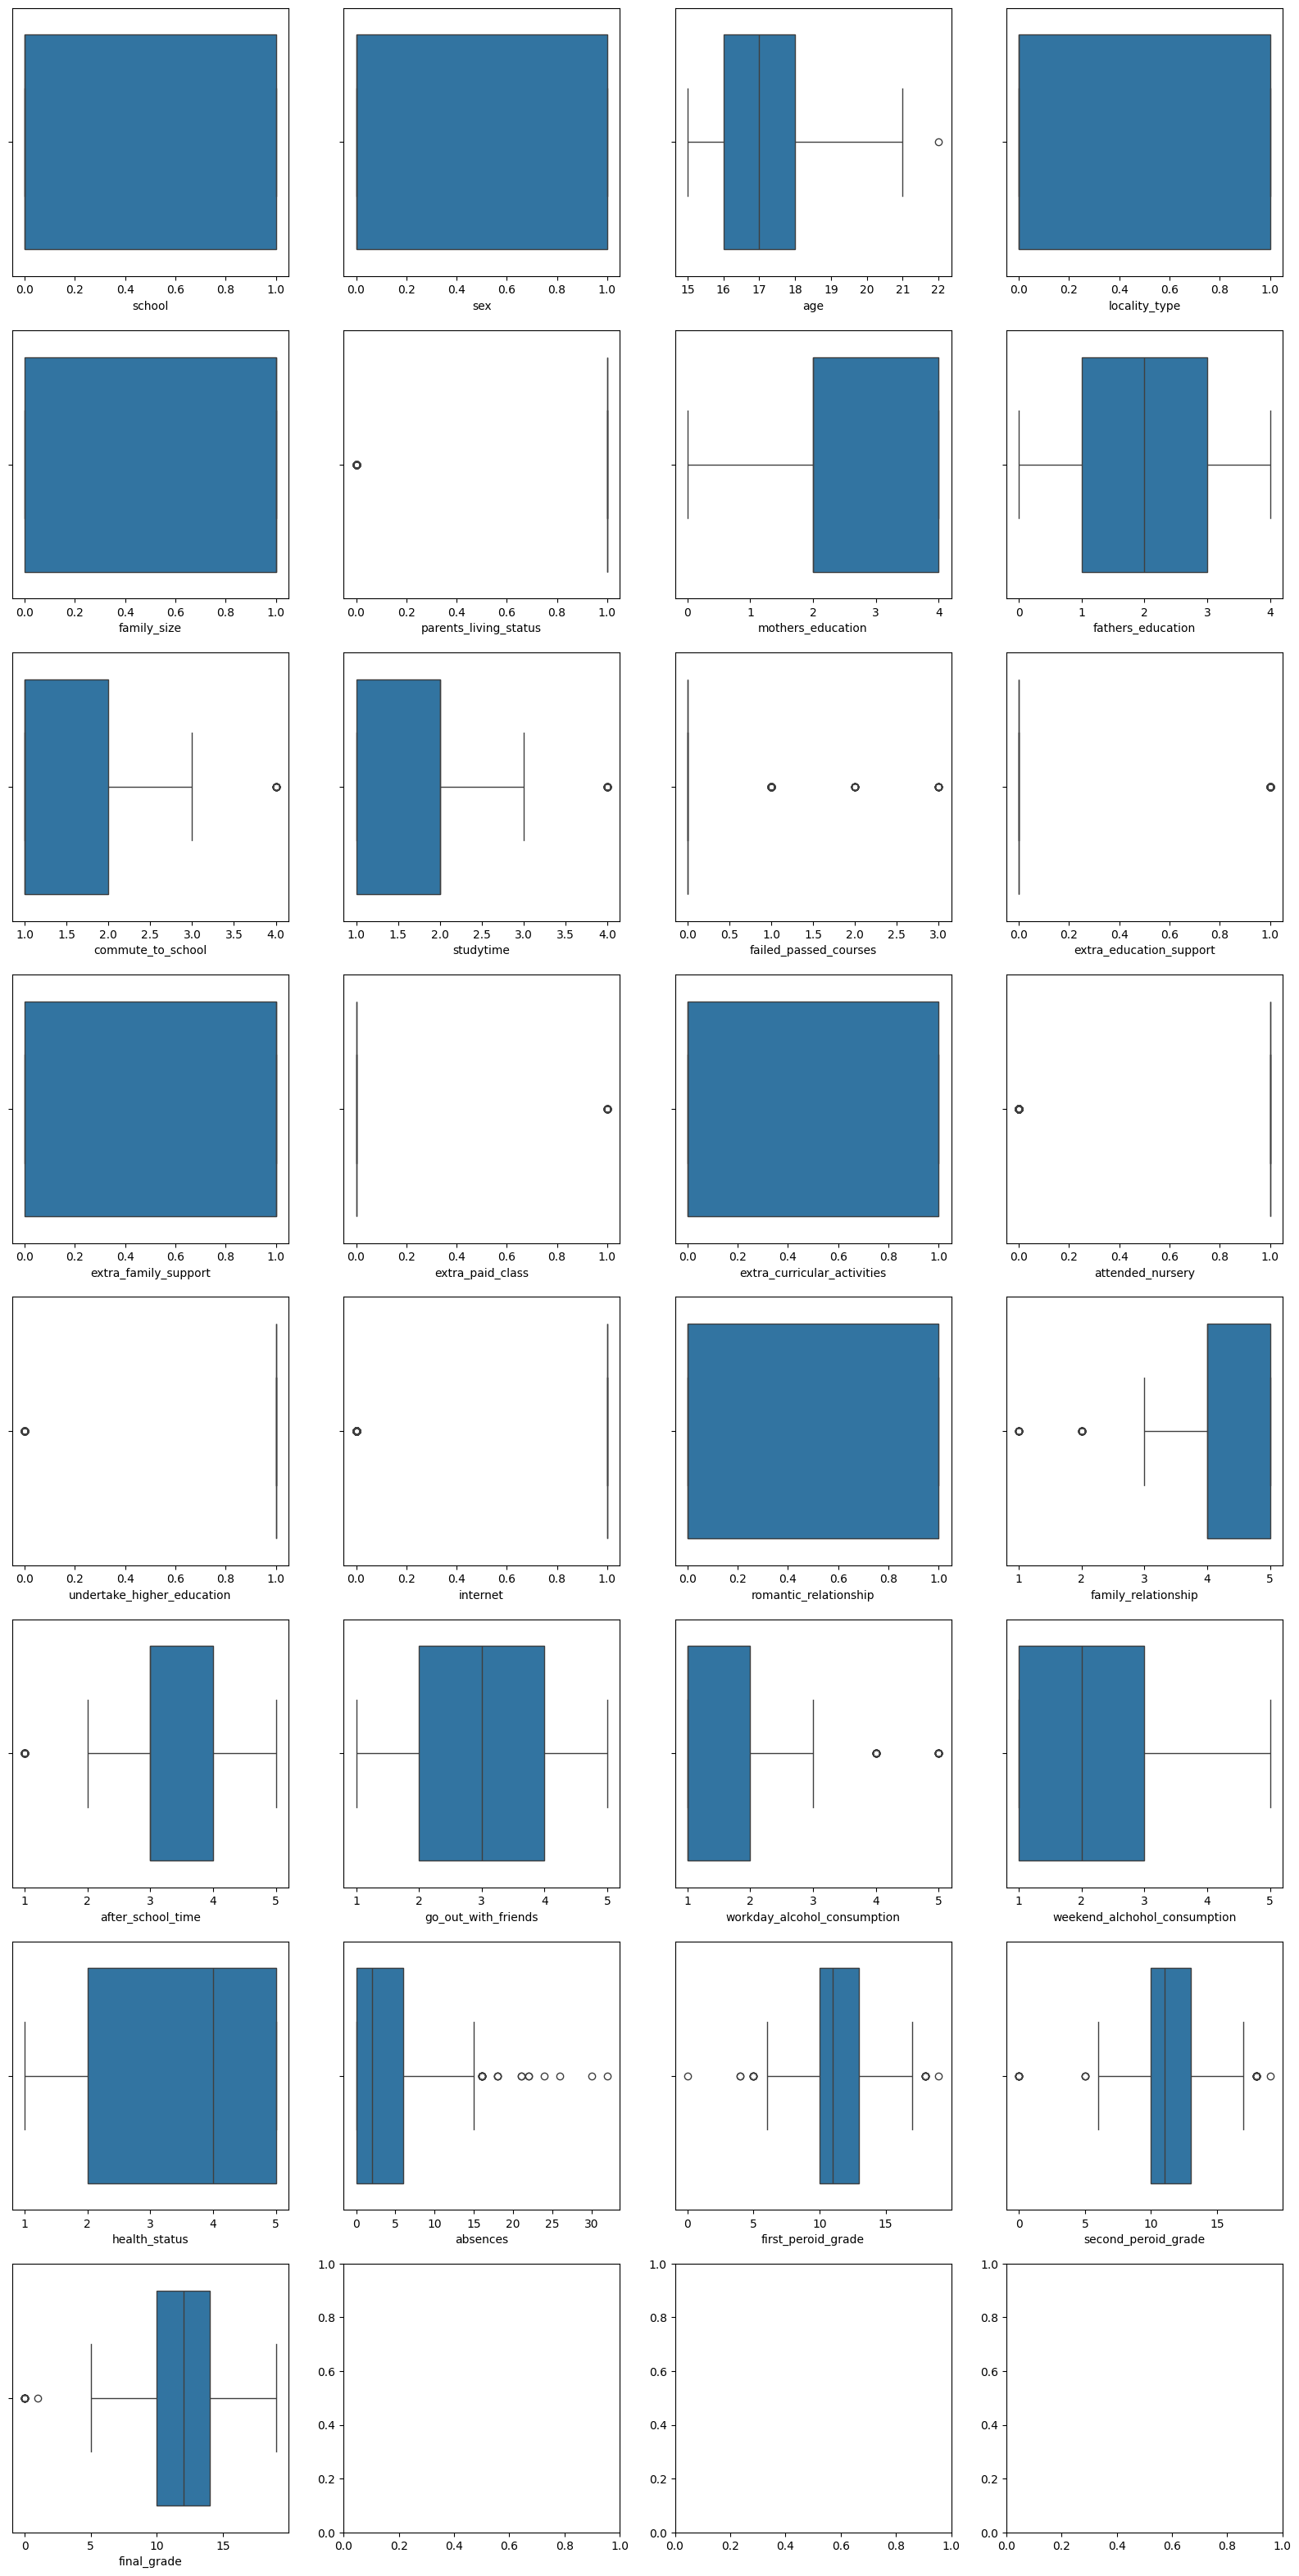

In [ ]:
#Plots using histogram
fig, ax = plt.subplots((len(numerical_features) // 4) + 1,4, figsize=(20,40))
for i in range(len(numerical_features)):
  c_axes = ax.flat[i]
  sns.boxplot(data=data, x=numerical_features[i], ax=c_axes)


plt.show()

#### Scatter plot of how the numerical independent attributes relates to the target attribute

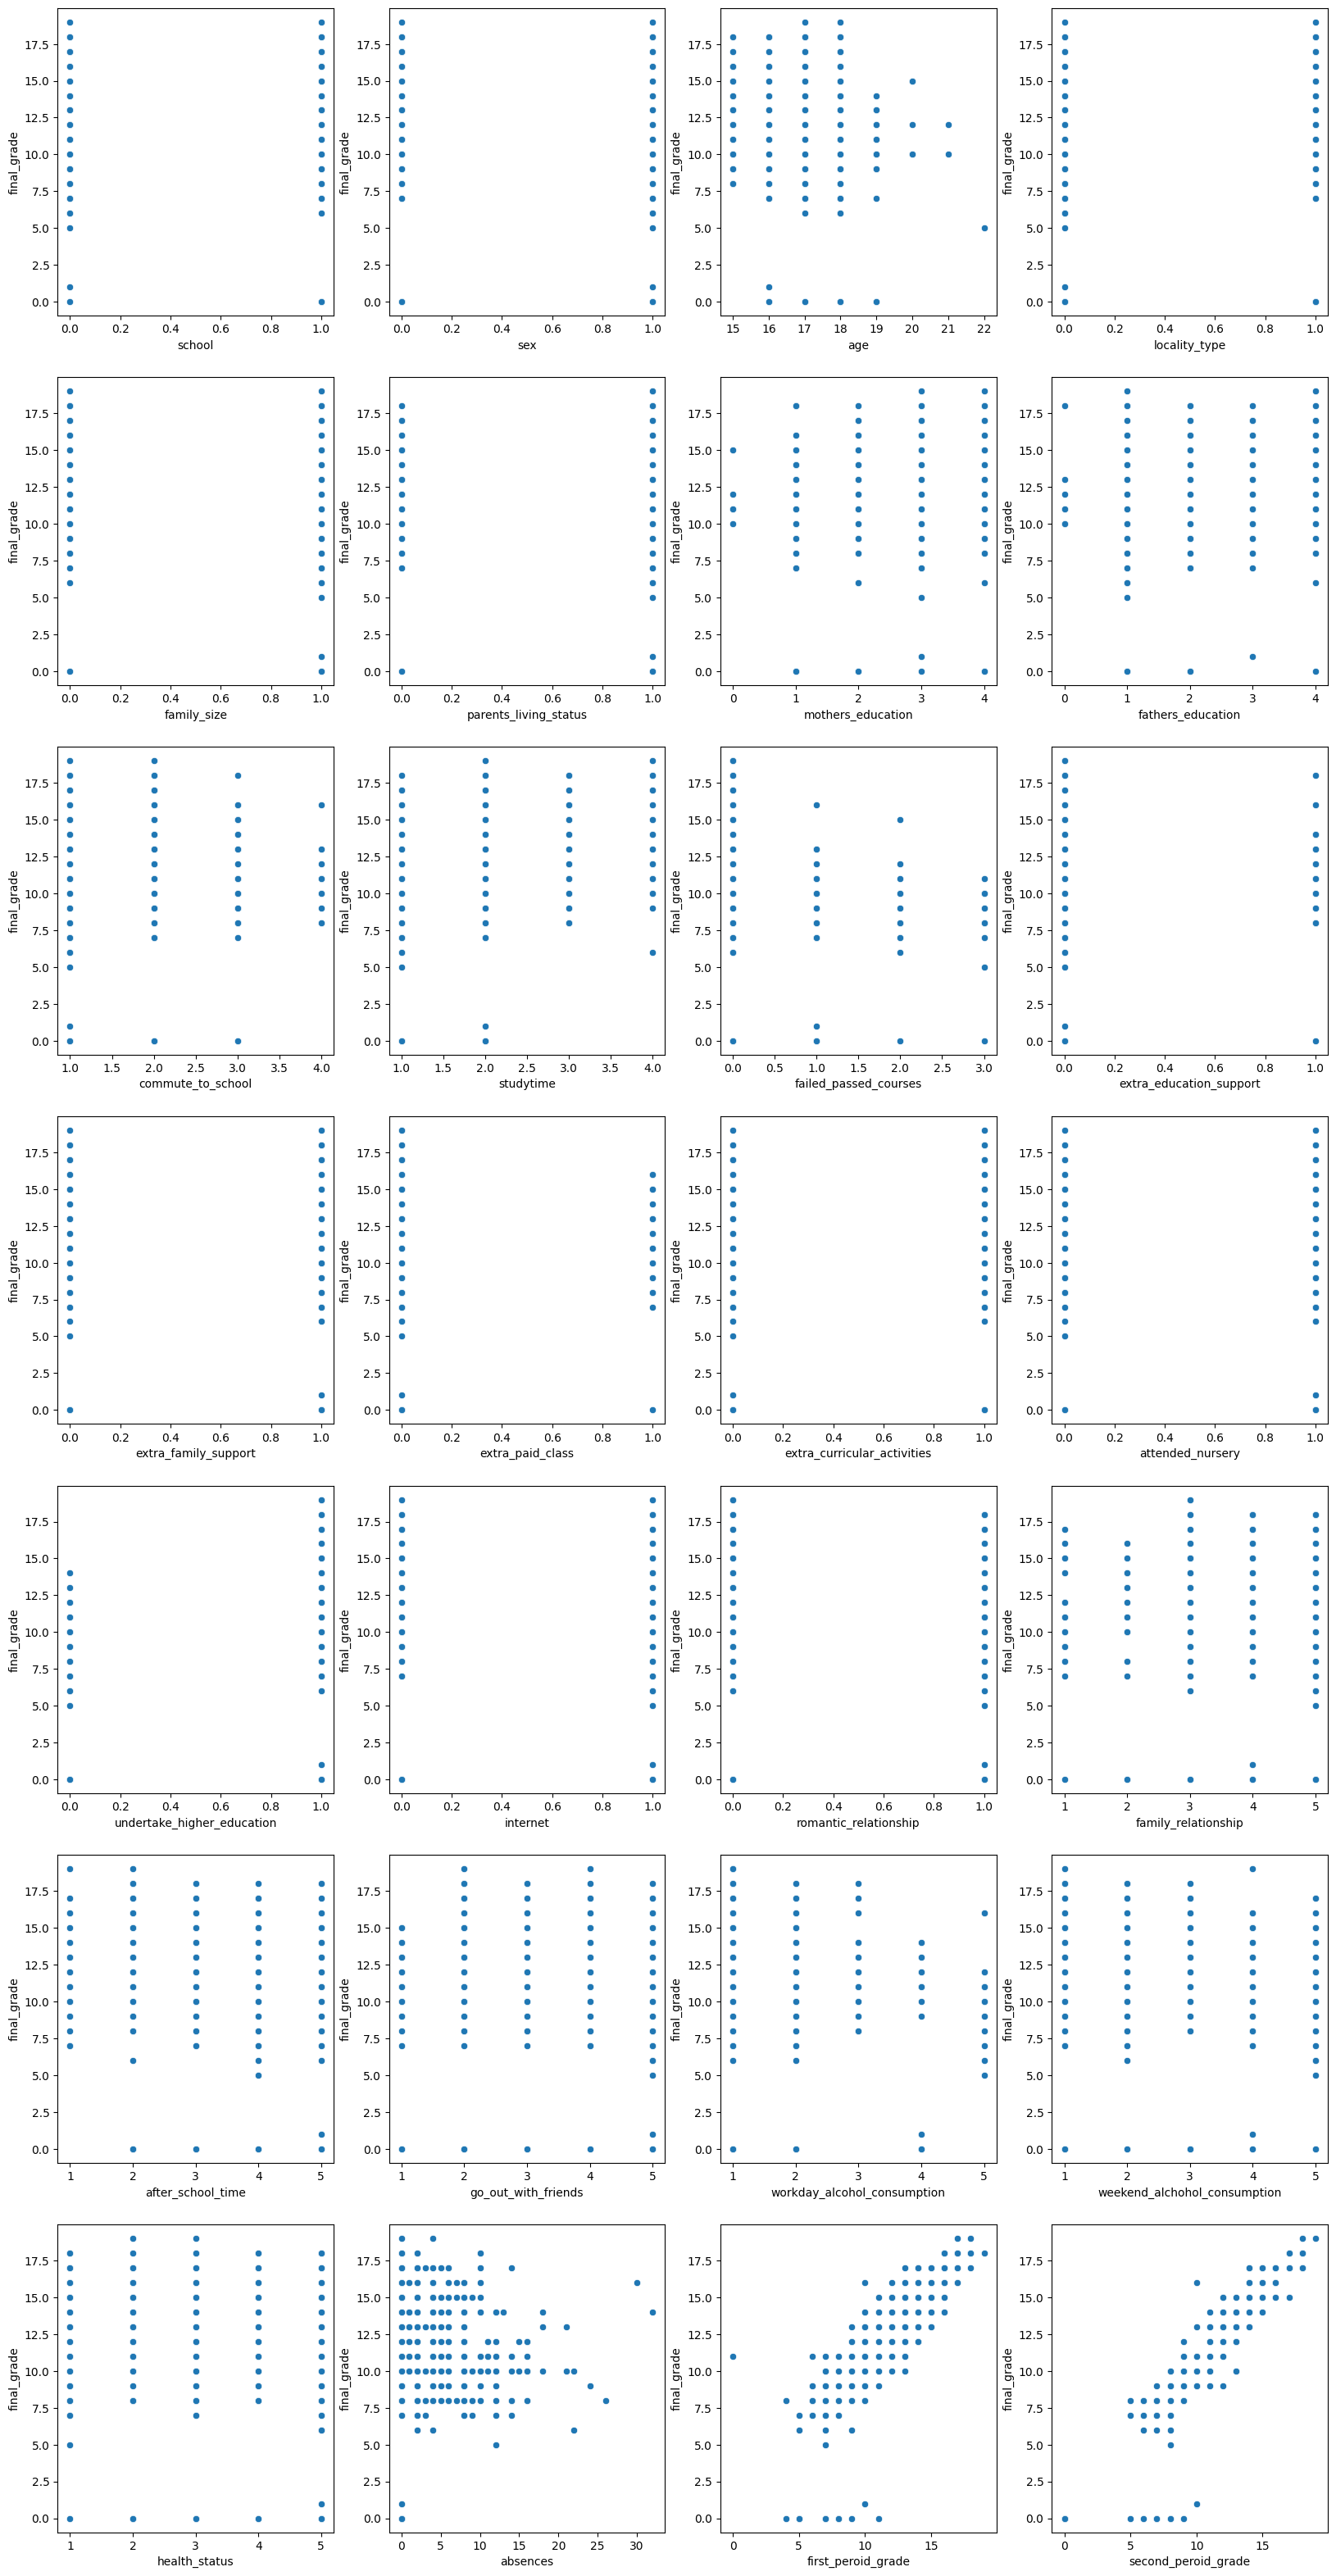

In [ ]:
#Final Grade
second_list = numerical_features.copy()
second_list.remove('final_grade')
fig, ax = plt.subplots((len(second_list) // 4),4, figsize=(20,40))
for i in range(len(second_list)):
  c_axes = ax.flat[i]
  sns.scatterplot(data=data, x=second_list[i], y='final_grade', ax=c_axes)

plt.show()

### Feature Engineering

In [ ]:
#creation of a copy of dataset
data_copy = data.copy()

In [ ]:
correlation = data[numerical_features].corr().round(2)
correlation

,school,sex,age,locality_type,family_size,parents_living_status,mothers_education,fathers_education,commute_to_school,studytime,...,family_relationship,after_school_time,go_out_with_friends,workday_alcohol_consumption,weekend_alchohol_consumption,health_status,absences,first_peroid_grade,second_peroid_grade,final_grade
school,1.00,-0.08,0.09,0.35,-0.02,0.03,-0.25,-0.21,0.25,-0.14,...,-0.03,0.03,0.04,0.05,0.01,-0.06,-0.16,-0.29,-0.27,-0.28
sex,-0.08,1.00,-0.04,-0.03,-0.10,0.06,0.12,0.08,0.04,-0.21,...,0.08,0.15,0.06,0.28,0.32,0.14,0.02,-0.10,-0.10,-0.13
age,0.09,-0.04,1.00,0.03,0.00,-0.01,-0.11,-0.12,0.03,-0.01,...,-0.02,-0.00,0.11,0.13,0.09,-0.01,0.15,-0.17,-0.11,-0.11
locality_type,0.35,-0.03,0.03,1.00,0.05,0.09,-0.19,-0.14,0.34,-0.06,...,0.03,0.04,-0.02,0.05,0.01,-0.00,-0.07,-0.16,-0.15,-0.17
family_size,-0.02,-0.10,0.00,0.05,1.00,0.24,0.01,0.04,-0.01,0.01,...,-0.00,0.02,0.00,-0.06,-0.08,-0.00,-0.00,-0.05,-0.04,-0.05
parents_living_status,0.03,0.06,-0.01,0.09,0.24,1.00,-0.06,-0.03,0.04,-0.01,...,0.05,0.04,0.03,0.04,0.07,0.01,-0.12,0.02,0.02,-0.00
mothers_education,-0.25,0.12,-0.11,-0.19,0.01,-0.06,1.00,0.65,-0.27,0.10,...,0.02,-0.02,0.01,-0.01,-0.02,0.00,-0.01,0.26,0.26,0.24
fathers_education,-0.21,0.08,-0.12,-0.14,0.04,-0.03,0.65,1.00,-0.21,0.05,...,0.02,0.01,0.03,0.00,0.04,0.04,0.03,0.22,0.23,0.21
commute_to_school,0.25,0.04,0.03,0.34,-0.01,0.04,-0.27,-0.21,1.00,-0.06,...,-0.01,0.00,0.06,0.09,0.06,-0.05,-0.01,-0.15,-0.15,-0.13
studytime,-0.14,-0.21,-0.01,-0.06,0.01,-0.01,0.10,0.05,-0.06,1.00,...,-0.00,-0.07,-0.08,-0.14,-0.21,-0.06,-0.12,0.26,0.24,0.25


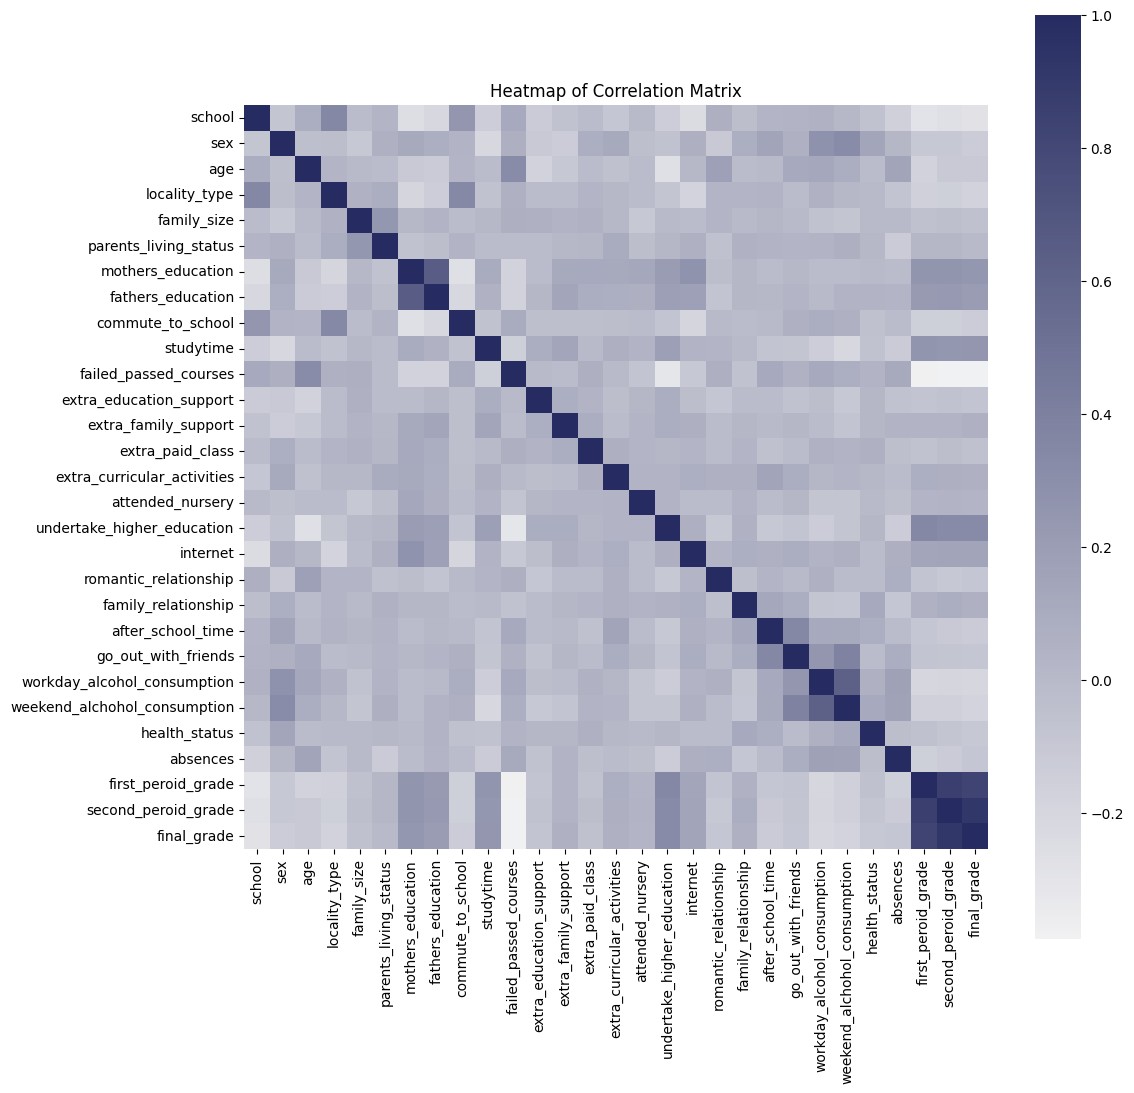

In [ ]:
#Checking the correalation of numerical data
custom_color = sns.light_palette("#262C61", as_cmap=True)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlation, square=True, cmap=custom_color)
plt.title("Heatmap of Correlation Matrix")
plt.show()

In [ ]:
#Since first peroid grade and second peroid grade are highly correlated to the final peroid grade
#final_grade will be used as the target feature
data.drop(columns=['first_peroid_grade', 'second_peroid_grade'], inplace=True)

## Classify final grade to fail or pass

In [ ]:
#Function to classify scores as pass or fail
def transform_grade(x):
  if x > 9:
    return 1
  else:
    return 0

#Function to Generate Table and Graph for minority and majority class in target
def check_balance(data_series):
  a = data_series.value_counts()
  a.name = 'Figure'
  pec = (a*100 / len(data_series)).round(2)
  pec.name = 'percentage'
  a = pd.concat([a,pec], axis=1)
  display(a)
  sns.catplot(data=data_series.to_frame(), x='final_grade', kind='count')
  plt.title("Distribution of Final Grade in Training Data")
  plt.show()

In [ ]:
#Classisfy Target into Pass or Fail
data['final_grade'] = data['final_grade'].apply(lambda x : transform_grade(x))

,Figure,percentage
final_grade,,
1,549,84.59
0,100,15.41


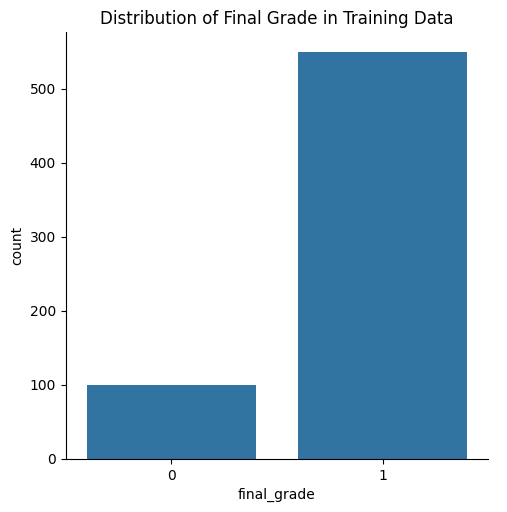

In [ ]:
#Distribution of target features
check_balance(data['final_grade'])

Target features is imbalance there we will consider an oversampling and hybrid approach and then compare the the 2 models

Splitting of Dataset into training data and testing data.
The split will ensure that training data will contain a proportional value from both the majority and minority classes.
Afterwards the training data will be preprocessed further by balancing the data and normalising the data to a standard scale

In [ ]:
#Spliting of dataset into training and testing data
target_feature = data['final_grade']
independent_features = data.drop(columns=['final_grade'])
from sklearn.model_selection import train_test_split

,Figure,percentage
final_grade,,
1,439,84.59
0,80,15.41


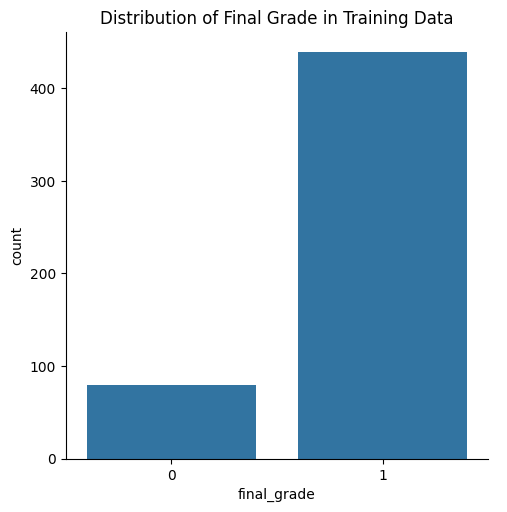

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independent_features, target_feature, test_size=0.2, random_state=43, stratify=target_feature)
check_balance(y_train)

## Furter preprocessing of training data

In [ ]:
#One Hot encoding
#Since training dataset contains both categorical and numerical data we
#leverage on the column transformer class to perform one hot encoding for only
#the categorical features
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
#update_categorical and numerical features list
categorical_features =list(X_train.select_dtypes(include='object').columns)
numerical_features = list(X_train.select_dtypes(include='number').columns)

#Creating pipeline for onehotencoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
#Creating pipeline for Standard Scalar
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers = [('cat', encoder, categorical_features),
                    ('num', scaler, numerical_features)],
    remainder='passthrough', verbose_feature_names_out=False
)

In [ ]:
#Perform the encoding
X_train_processed = preprocessor.fit_transform(X_train)

#Scaling Test set with the fiting from the training data
X_test_processed = preprocessor.transform(X_test)

#convert the returned numpy array to a dataframe
X_train_processed = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())
X_test_processed = pd.DataFrame(X_test_processed, columns=preprocessor.get_feature_names_out())


# Balancing with Oversampling
The Dataset has relatively fewer instances therefore we would consider oversampling techniques



In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

## Smote Oversampling

In [ ]:
#Create SMOTE Oversmapling class
minority_balance = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)

In [ ]:
#Create Traning Sample
X_train_smote, y_train_smote = minority_balance.fit_resample(X_train_processed, y_train)

,Figure,percentage
final_grade,,
1,439,50.0
0,439,50.0


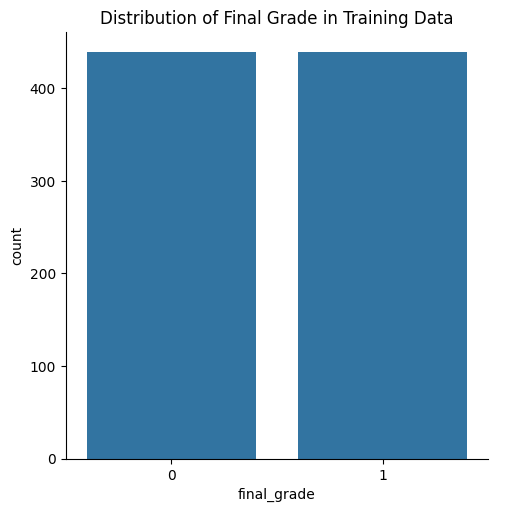

In [ ]:
check_balance(y_train_smote)

## Balancing with ADASYN

In [ ]:
#Creating ADASYN Balancing class
adasyn_balance = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)

,Figure,percentage
final_grade,,
1,439,50.23
0,435,49.77


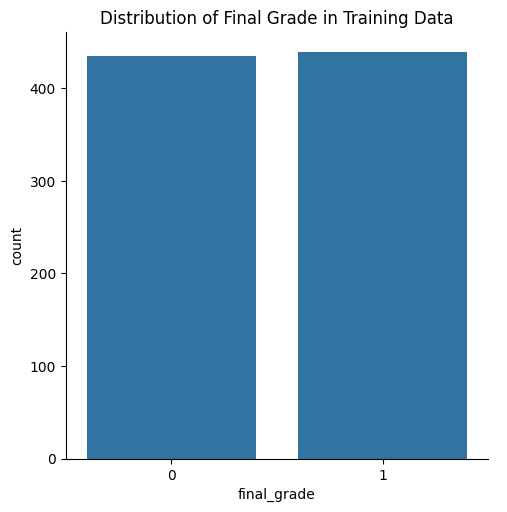

In [ ]:
#Balancing training data
x_train_adasyn, y_train_adasyn = adasyn_balance.fit_resample(X_train_processed, y_train)
check_balance(y_train_adasyn)

## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#logistic regression model
model = LogisticRegression()

In [ ]:
#Imbalanced data
model.fit(X_train_processed, y_train)
imbalanced_data_predictions = model.predict(X_test_processed)

In [ ]:
#SMOTE Oversmapling
model.fit(X_train_smote, y_train_smote)
smote_predictions = model.predict(X_test_processed)

In [ ]:
#ADASYN Oversampling
model.fit(x_train_adasyn, y_train_adasyn)
adasyn_predictions = model.predict(X_test_processed)

#Evaluating Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### ACCURACY SCORE

In [ ]:
#Accuracy Score
imbalanced_accuracy = round(100 * accuracy_score(y_test, imbalanced_data_predictions),2)
smote_accuracy = round(100 * accuracy_score(y_test, smote_predictions),2)
adasyn_accuracy = round(100 * accuracy_score(y_test, adasyn_predictions),2)
print(f"Imbalanced Data Accuracy: {imbalanced_accuracy}")
print(f"SMOTE Accuracy: {smote_accuracy}%")
print(f"ADASYN Accuracy: {adasyn_accuracy}%")

Imbalanced Data Accuracy: 83.85
SMOTE Accuracy: 76.15%
ADASYN Accuracy: 78.46%


### Recall, Precision and F1-Score

In [ ]:
#Get reports
columns = ['precision', 'recall', 'f1-score']
imbalanced_report = pd.DataFrame(classification_report(y_test, imbalanced_data_predictions, output_dict=True,target_names=["Fail", "Pass"])).transpose()
smote_report = pd.DataFrame(classification_report(y_test, smote_predictions, output_dict=True,target_names=["Fail", "Pass"])).transpose()
adasyn_report = pd.DataFrame(classification_report(y_test, adasyn_predictions, output_dict=True,target_names=["Fail", "Pass"])).transpose()

for i in columns:
  imbalanced_report[i] = (100*imbalanced_report[i]).round(2)
  smote_report[i] = (100*smote_report[i]).round(2)
  adasyn_report[i] = (100*adasyn_report[i]).round(2)

#Print Results
print("Imabalanced \n " + "*" * 50)
display(imbalanced_report)
print("*" * 15)
print("SMOTE Report \n " + "*" * 50)
display(smote_report)
print("*" * 15)
print("ADASYN Report \n " + "*" * 50)
display(adasyn_report)

Imabalanced 
 **************************************************


,precision,recall,f1-score,support
Fail,45.45,25.00,32.26,20.000000
Pass,87.39,94.55,90.83,110.000000
accuracy,83.85,83.85,83.85,0.838462
macro avg,66.42,59.77,61.54,130.000000
weighted avg,80.94,83.85,81.82,130.000000


***************
SMOTE Report 
 **************************************************


,precision,recall,f1-score,support
Fail,35.14,65.00,45.61,20.000000
Pass,92.47,78.18,84.73,110.000000
accuracy,76.15,76.15,76.15,0.761538
macro avg,63.80,71.59,65.17,130.000000
weighted avg,83.65,76.15,78.71,130.000000


***************
ADASYN Report 
 **************************************************


,precision,recall,f1-score,support
Fail,38.89,70.00,50.00,20.000000
Pass,93.62,80.00,86.27,110.000000
accuracy,78.46,78.46,78.46,0.784615
macro avg,66.25,75.00,68.14,130.000000
weighted avg,85.20,78.46,80.69,130.000000


### Confusion Matrix

In [ ]:
#Get Confusion Matrix
imbalanced_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, imbalanced_data_predictions))
smote_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, smote_predictions))
adasyn_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, adasyn_predictions))

#Display matrix
print("Imbalanced data Confusion Matrix \n " + "*" *25)
display(imbalanced_confusion_matrix)
print("*" * 15)
print("SMOTE Confusion Matrix \n " + "*" *25)
display(smote_confusion_matrix)
print("*" * 15)
print("ADASYN Confustion Matrix \n " + "*" * 25)
display(adasyn_confusion_matrix)

Imbalanced data Confusion Matrix 
 *************************


,0,1
0,5,15
1,6,104


***************
SMOTE Confusion Matrix 
 *************************


,0,1
0,13,7
1,24,86


***************
ADASYN Confustion Matrix 
 *************************


,0,1
0,14,6
1,22,88
